cycle 0
cycle 1
cycle 2
cycle 3
cycle 4
cycle 5
cycle 6
cycle 7
cycle 8
cycle 9
cycle 10
cycle 11
cycle 12
cycle 13
cycle 14
cycle 15
cycle 16
cycle 17
cycle 18
cycle 19
cycle 20
cycle 21
cycle 22
cycle 23
cycle 24
cycle 25
cycle 26
cycle 27
cycle 28
cycle 29
cycle 30
cycle 31
cycle 32
cycle 33
cycle 34
cycle 35
cycle 36
cycle 37
cycle 38
cycle 39
cycle 40
cycle 41
cycle 42
cycle 43
cycle 44
cycle 45
cycle 46
cycle 47
cycle 48
cycle 49
cycle 50
cycle 51
cycle 52
cycle 53
cycle 54
cycle 55
cycle 56
cycle 57
cycle 58
cycle 59
Running comparison


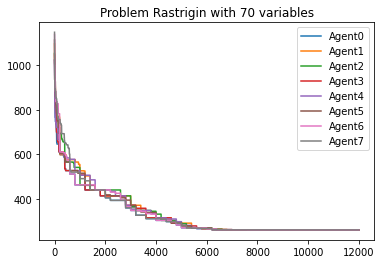

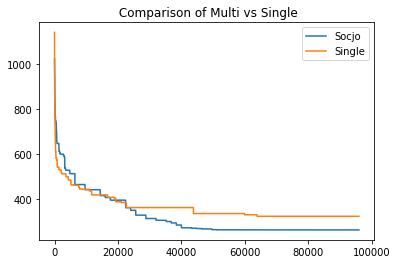

cycle 0
cycle 1
cycle 2
cycle 3
cycle 4
cycle 5
cycle 6
cycle 7
cycle 8
cycle 9
cycle 10
cycle 11
cycle 12
cycle 13
cycle 14
cycle 15
cycle 16
cycle 17
cycle 18
cycle 19
cycle 20
cycle 21
cycle 22
cycle 23
cycle 24
cycle 25
cycle 26
cycle 27
cycle 28
cycle 29
cycle 30
cycle 31
cycle 32
cycle 33
cycle 34
cycle 35
cycle 36
cycle 37
cycle 38
cycle 39
cycle 40
cycle 41
cycle 42
cycle 43
cycle 44
cycle 45
cycle 46
cycle 47
cycle 48
cycle 49
cycle 50
cycle 51
cycle 52
cycle 53
cycle 54
cycle 55
cycle 56
cycle 57
cycle 58
cycle 59
Running comparison


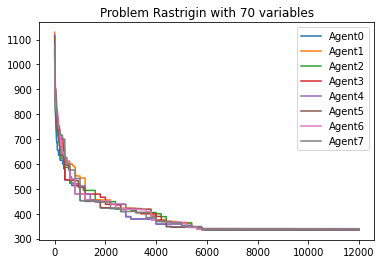

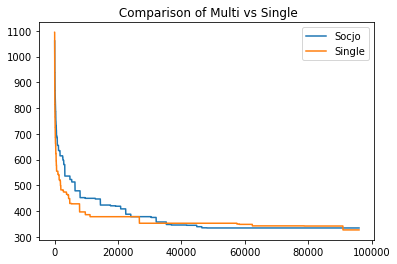

cycle 0
cycle 1
cycle 2
cycle 3
cycle 4
cycle 5
cycle 6
cycle 7
cycle 8
cycle 9
cycle 10
cycle 11
cycle 12
cycle 13
cycle 14
cycle 15
cycle 16
cycle 17
cycle 18
cycle 19
cycle 20
cycle 21
cycle 22
cycle 23
cycle 24
cycle 25
cycle 26
cycle 27
cycle 28
cycle 29
cycle 30
cycle 31
cycle 32
cycle 33
cycle 34
cycle 35
cycle 36
cycle 37
cycle 38
cycle 39
cycle 40
cycle 41
cycle 42
cycle 43
cycle 44
cycle 45
cycle 46
cycle 47
cycle 48
cycle 49
cycle 50
cycle 51
cycle 52
cycle 53
cycle 54
cycle 55
cycle 56
cycle 57
cycle 58
cycle 59
Running comparison


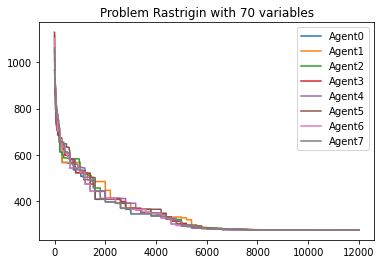

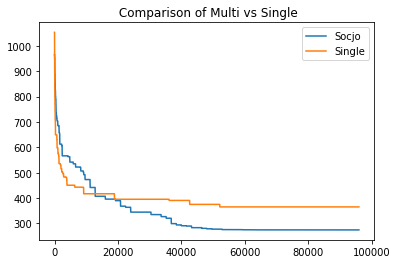

cycle 0
cycle 1
cycle 2
cycle 3
cycle 4
cycle 5
cycle 6
cycle 7
cycle 8
cycle 9
cycle 10
cycle 11
cycle 12
cycle 13
cycle 14
cycle 15
cycle 16
cycle 17
cycle 18
cycle 19
cycle 20
cycle 21
cycle 22
cycle 23
cycle 24
cycle 25
cycle 26
cycle 27
cycle 28
cycle 29
cycle 30
cycle 31
cycle 32
cycle 33
cycle 34
cycle 35
cycle 36
cycle 37
cycle 38
cycle 39
cycle 40
cycle 41
cycle 42
cycle 43
cycle 44
cycle 45
cycle 46
cycle 47
cycle 48
cycle 49
cycle 50
cycle 51
cycle 52
cycle 53
cycle 54
cycle 55
cycle 56
cycle 57
cycle 58
cycle 59
Running comparison


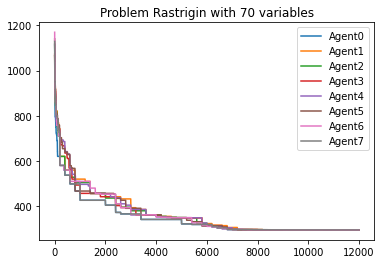

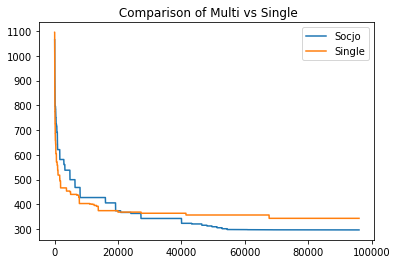

cycle 0
cycle 1
cycle 2
cycle 3
cycle 4
cycle 5
cycle 6
cycle 7
cycle 8
cycle 9
cycle 10
cycle 11
cycle 12
cycle 13
cycle 14
cycle 15
cycle 16
cycle 17
cycle 18
cycle 19
cycle 20
cycle 21
cycle 22
cycle 23
cycle 24
cycle 25
cycle 26
cycle 27
cycle 28
cycle 29
cycle 30
cycle 31
cycle 32
cycle 33
cycle 34
cycle 35
cycle 36
cycle 37
cycle 38
cycle 39
cycle 40
cycle 41
cycle 42
cycle 43
cycle 44
cycle 45
cycle 46
cycle 47
cycle 48
cycle 49
cycle 50
cycle 51
cycle 52
cycle 53
cycle 54
cycle 55
cycle 56
cycle 57
cycle 58
cycle 59
Running comparison


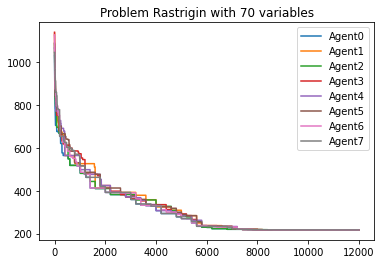

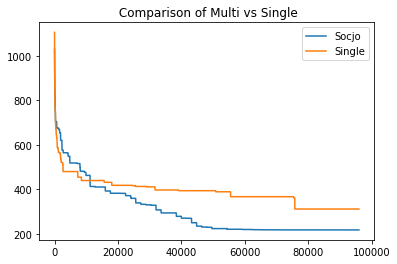

cycle 0
cycle 1
cycle 2
cycle 3
cycle 4
cycle 5
cycle 6
cycle 7
cycle 8
cycle 9
cycle 10
cycle 11
cycle 12
cycle 13
cycle 14
cycle 15
cycle 16
cycle 17
cycle 18
cycle 19
cycle 20
cycle 21
cycle 22
cycle 23
cycle 24
cycle 25
cycle 26
cycle 27
cycle 28
cycle 29
cycle 30
cycle 31
cycle 32
cycle 33
cycle 34
cycle 35
cycle 36
cycle 37
cycle 38
cycle 39
cycle 40
cycle 41
cycle 42
cycle 43
cycle 44
cycle 45
cycle 46
cycle 47
cycle 48
cycle 49
cycle 50
cycle 51
cycle 52
cycle 53
cycle 54
cycle 55
cycle 56
cycle 57
cycle 58
cycle 59
Running comparison


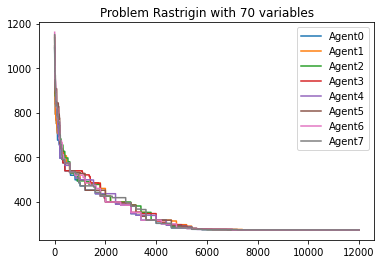

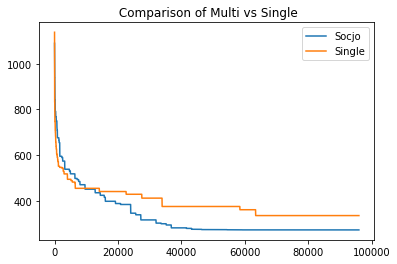

cycle 0
cycle 1
cycle 2
cycle 3
cycle 4
cycle 5
cycle 6
cycle 7
cycle 8
cycle 9
cycle 10
cycle 11
cycle 12
cycle 13
cycle 14
cycle 15
cycle 16
cycle 17
cycle 18
cycle 19
cycle 20
cycle 21
cycle 22
cycle 23
cycle 24
cycle 25
cycle 26
cycle 27
cycle 28
cycle 29
cycle 30
cycle 31
cycle 32
cycle 33
cycle 34
cycle 35
cycle 36
cycle 37
cycle 38
cycle 39
cycle 40
cycle 41
cycle 42
cycle 43
cycle 44
cycle 45
cycle 46
cycle 47
cycle 48
cycle 49
cycle 50
cycle 51
cycle 52
cycle 53
cycle 54
cycle 55
cycle 56
cycle 57
cycle 58
cycle 59
Running comparison


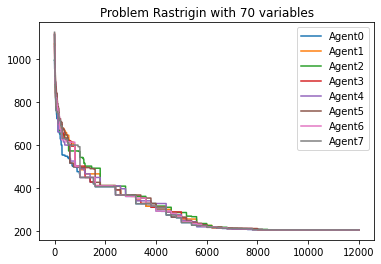

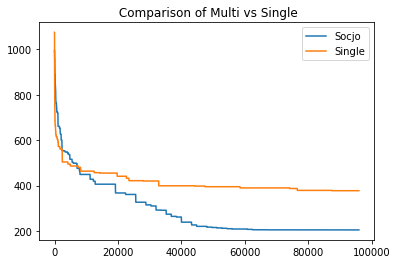

cycle 0
cycle 1
cycle 2
cycle 3
cycle 4
cycle 5
cycle 6
cycle 7
cycle 8
cycle 9
cycle 10
cycle 11
cycle 12
cycle 13
cycle 14
cycle 15
cycle 16
cycle 17
cycle 18
cycle 19
cycle 20
cycle 21
cycle 22
cycle 23
cycle 24
cycle 25
cycle 26
cycle 27
cycle 28
cycle 29
cycle 30
cycle 31
cycle 32
cycle 33
cycle 34
cycle 35
cycle 36
cycle 37
cycle 38
cycle 39
cycle 40
cycle 41
cycle 42
cycle 43
cycle 44
cycle 45
cycle 46
cycle 47
cycle 48
cycle 49
cycle 50
cycle 51
cycle 52
cycle 53
cycle 54
cycle 55
cycle 56
cycle 57
cycle 58
cycle 59
Running comparison


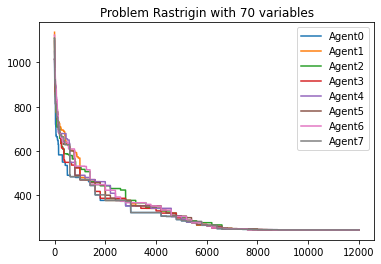

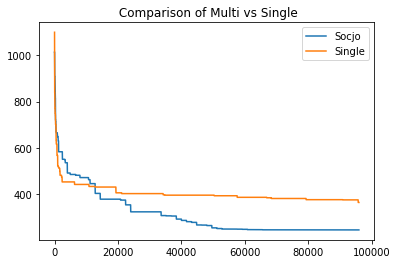

cycle 0
cycle 1
cycle 2
cycle 3
cycle 4
cycle 5
cycle 6
cycle 7
cycle 8
cycle 9
cycle 10
cycle 11
cycle 12
cycle 13
cycle 14
cycle 15
cycle 16
cycle 17
cycle 18
cycle 19
cycle 20
cycle 21
cycle 22
cycle 23
cycle 24
cycle 25
cycle 26
cycle 27
cycle 28
cycle 29
cycle 30
cycle 31
cycle 32
cycle 33
cycle 34
cycle 35
cycle 36
cycle 37
cycle 38
cycle 39
cycle 40
cycle 41
cycle 42
cycle 43
cycle 44
cycle 45
cycle 46
cycle 47
cycle 48
cycle 49
cycle 50
cycle 51
cycle 52
cycle 53
cycle 54
cycle 55
cycle 56
cycle 57
cycle 58
cycle 59
Running comparison


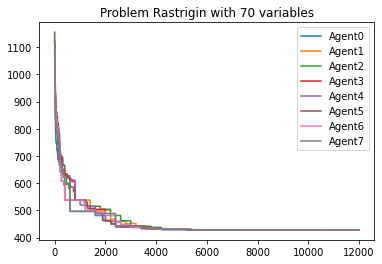

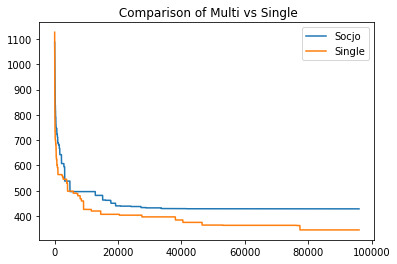

cycle 0
cycle 1
cycle 2
cycle 3
cycle 4
cycle 5
cycle 6
cycle 7
cycle 8
cycle 9
cycle 10
cycle 11
cycle 12
cycle 13
cycle 14
cycle 15
cycle 16
cycle 17
cycle 18
cycle 19
cycle 20
cycle 21
cycle 22
cycle 23
cycle 24
cycle 25
cycle 26
cycle 27
cycle 28
cycle 29
cycle 30
cycle 31
cycle 32
cycle 33
cycle 34
cycle 35
cycle 36
cycle 37
cycle 38
cycle 39
cycle 40
cycle 41
cycle 42
cycle 43
cycle 44
cycle 45
cycle 46
cycle 47
cycle 48
cycle 49
cycle 50
cycle 51
cycle 52
cycle 53
cycle 54
cycle 55
cycle 56
cycle 57
cycle 58
cycle 59
Running comparison


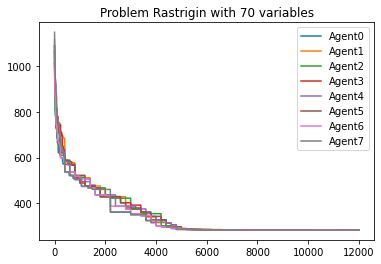

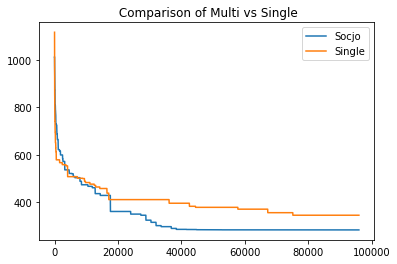

cycle 0
cycle 1
cycle 2
cycle 3
cycle 4
cycle 5
cycle 6
cycle 7
cycle 8
cycle 9
cycle 10
cycle 11
cycle 12
cycle 13
cycle 14
cycle 15
cycle 16
cycle 17
cycle 18
cycle 19
cycle 20
cycle 21
cycle 22
cycle 23
cycle 24
cycle 25
cycle 26
cycle 27
cycle 28
cycle 29
cycle 30
cycle 31
cycle 32
cycle 33
cycle 34
cycle 35
cycle 36
cycle 37
cycle 38
cycle 39
cycle 40
cycle 41
cycle 42
cycle 43
cycle 44
cycle 45
cycle 46
cycle 47
cycle 48
cycle 49
cycle 50
cycle 51
cycle 52
cycle 53
cycle 54
cycle 55
cycle 56
cycle 57
cycle 58
cycle 59
Running comparison


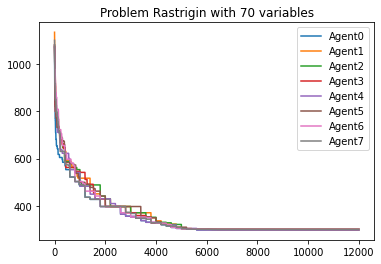

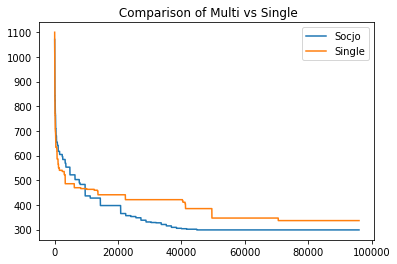

cycle 0
cycle 1
cycle 2
cycle 3
cycle 4
cycle 5
cycle 6
cycle 7
cycle 8
cycle 9
cycle 10
cycle 11
cycle 12
cycle 13
cycle 14
cycle 15
cycle 16
cycle 17
cycle 18
cycle 19
cycle 20
cycle 21
cycle 22
cycle 23
cycle 24
cycle 25
cycle 26
cycle 27
cycle 28
cycle 29
cycle 30
cycle 31
cycle 32
cycle 33
cycle 34
cycle 35
cycle 36
cycle 37
cycle 38
cycle 39
cycle 40
cycle 41
cycle 42
cycle 43
cycle 44
cycle 45
cycle 46
cycle 47
cycle 48
cycle 49
cycle 50
cycle 51
cycle 52
cycle 53
cycle 54
cycle 55
cycle 56
cycle 57
cycle 58
cycle 59
Running comparison


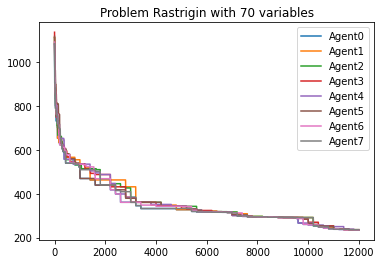

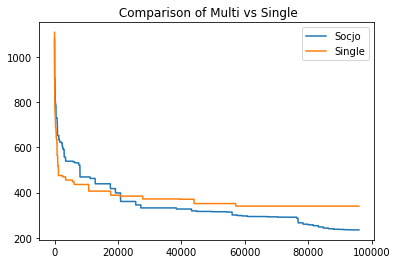

cycle 0
cycle 1
cycle 2
cycle 3
cycle 4
cycle 5
cycle 6
cycle 7
cycle 8
cycle 9
cycle 10
cycle 11
cycle 12
cycle 13
cycle 14
cycle 15
cycle 16
cycle 17
cycle 18
cycle 19
cycle 20
cycle 21
cycle 22
cycle 23
cycle 24
cycle 25
cycle 26
cycle 27
cycle 28
cycle 29
cycle 30
cycle 31
cycle 32
cycle 33
cycle 34
cycle 35
cycle 36
cycle 37
cycle 38
cycle 39
cycle 40
cycle 41
cycle 42
cycle 43
cycle 44
cycle 45
cycle 46
cycle 47
cycle 48
cycle 49
cycle 50
cycle 51
cycle 52
cycle 53
cycle 54
cycle 55
cycle 56
cycle 57
cycle 58
cycle 59
Running comparison


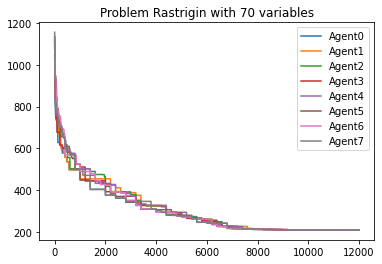

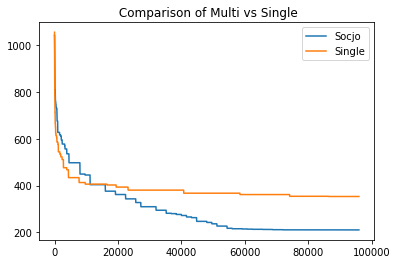

cycle 0
cycle 1
cycle 2
cycle 3
cycle 4
cycle 5
cycle 6
cycle 7
cycle 8
cycle 9
cycle 10
cycle 11
cycle 12
cycle 13
cycle 14
cycle 15
cycle 16
cycle 17
cycle 18
cycle 19
cycle 20
cycle 21
cycle 22
cycle 23
cycle 24
cycle 25
cycle 26
cycle 27
cycle 28
cycle 29
cycle 30
cycle 31
cycle 32
cycle 33
cycle 34
cycle 35
cycle 36
cycle 37
cycle 38
cycle 39
cycle 40
cycle 41
cycle 42
cycle 43
cycle 44
cycle 45
cycle 46
cycle 47
cycle 48
cycle 49
cycle 50
cycle 51
cycle 52
cycle 53
cycle 54
cycle 55
cycle 56
cycle 57
cycle 58
cycle 59
Running comparison


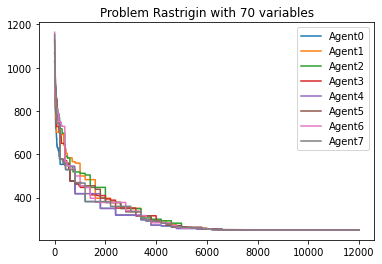

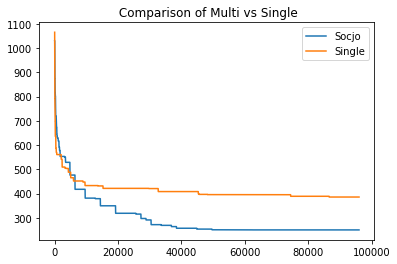

cycle 0
cycle 1
cycle 2
cycle 3
cycle 4
cycle 5
cycle 6
cycle 7
cycle 8
cycle 9
cycle 10
cycle 11
cycle 12
cycle 13
cycle 14
cycle 15
cycle 16
cycle 17
cycle 18
cycle 19
cycle 20
cycle 21
cycle 22
cycle 23
cycle 24
cycle 25
cycle 26
cycle 27
cycle 28
cycle 29
cycle 30
cycle 31
cycle 32
cycle 33
cycle 34
cycle 35
cycle 36
cycle 37
cycle 38
cycle 39
cycle 40
cycle 41
cycle 42
cycle 43
cycle 44
cycle 45
cycle 46
cycle 47
cycle 48
cycle 49
cycle 50
cycle 51
cycle 52
cycle 53
cycle 54
cycle 55
cycle 56
cycle 57
cycle 58
cycle 59
Running comparison


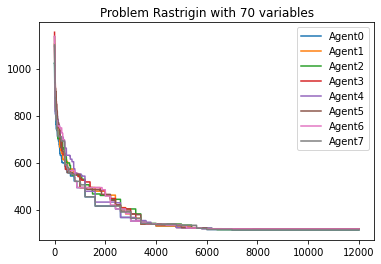

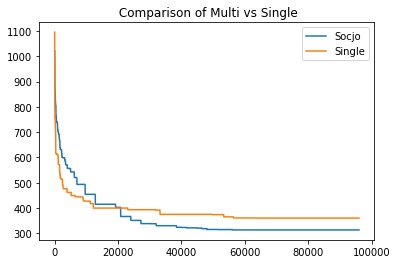

cycle 0
cycle 1
cycle 2
cycle 3
cycle 4
cycle 5
cycle 6
cycle 7
cycle 8
cycle 9
cycle 10
cycle 11
cycle 12
cycle 13
cycle 14
cycle 15
cycle 16
cycle 17
cycle 18
cycle 19
cycle 20
cycle 21
cycle 22
cycle 23
cycle 24
cycle 25
cycle 26
cycle 27
cycle 28
cycle 29
cycle 30
cycle 31
cycle 32
cycle 33
cycle 34
cycle 35
cycle 36
cycle 37
cycle 38
cycle 39
cycle 40
cycle 41
cycle 42
cycle 43
cycle 44
cycle 45
cycle 46
cycle 47
cycle 48
cycle 49
cycle 50
cycle 51
cycle 52
cycle 53
cycle 54
cycle 55
cycle 56
cycle 57
cycle 58
cycle 59
Running comparison


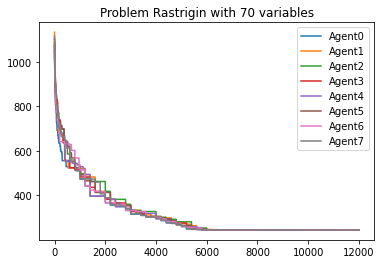

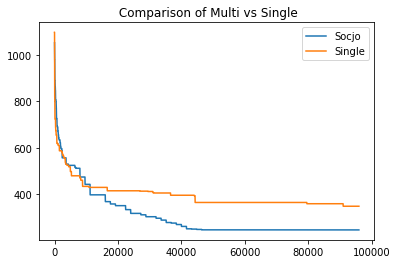

cycle 0
cycle 1
cycle 2
cycle 3
cycle 4
cycle 5
cycle 6
cycle 7
cycle 8
cycle 9
cycle 10
cycle 11
cycle 12
cycle 13
cycle 14
cycle 15
cycle 16
cycle 17
cycle 18
cycle 19
cycle 20
cycle 21
cycle 22
cycle 23
cycle 24
cycle 25
cycle 26
cycle 27
cycle 28
cycle 29
cycle 30
cycle 31
cycle 32
cycle 33
cycle 34
cycle 35
cycle 36
cycle 37
cycle 38
cycle 39
cycle 40
cycle 41
cycle 42
cycle 43
cycle 44
cycle 45
cycle 46
cycle 47
cycle 48
cycle 49
cycle 50
cycle 51
cycle 52
cycle 53
cycle 54
cycle 55
cycle 56
cycle 57
cycle 58
cycle 59
Running comparison


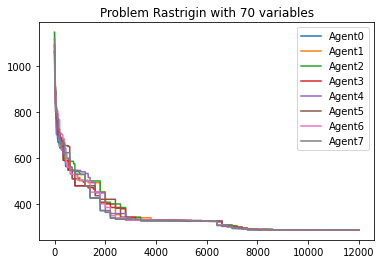

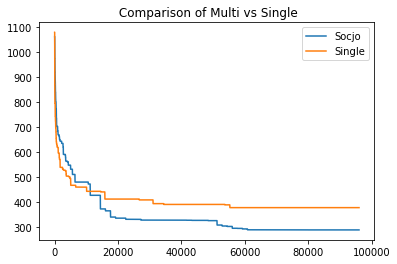

cycle 0
cycle 1
cycle 2
cycle 3
cycle 4
cycle 5
cycle 6
cycle 7
cycle 8
cycle 9
cycle 10
cycle 11
cycle 12
cycle 13
cycle 14
cycle 15
cycle 16
cycle 17
cycle 18
cycle 19
cycle 20
cycle 21
cycle 22
cycle 23
cycle 24
cycle 25
cycle 26
cycle 27
cycle 28
cycle 29
cycle 30
cycle 31
cycle 32
cycle 33
cycle 34
cycle 35
cycle 36
cycle 37
cycle 38
cycle 39
cycle 40
cycle 41
cycle 42
cycle 43
cycle 44
cycle 45
cycle 46
cycle 47
cycle 48
cycle 49
cycle 50
cycle 51
cycle 52
cycle 53
cycle 54
cycle 55
cycle 56
cycle 57
cycle 58
cycle 59
Running comparison


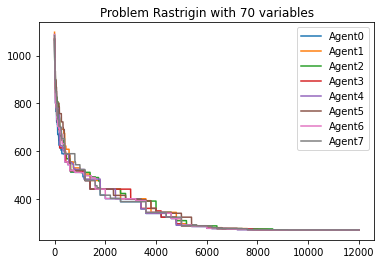

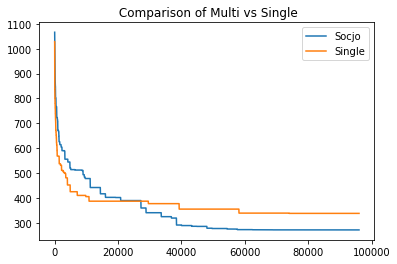

cycle 0
cycle 1
cycle 2
cycle 3
cycle 4
cycle 5
cycle 6
cycle 7
cycle 8
cycle 9
cycle 10
cycle 11
cycle 12
cycle 13
cycle 14
cycle 15
cycle 16
cycle 17
cycle 18
cycle 19
cycle 20
cycle 21
cycle 22
cycle 23
cycle 24
cycle 25
cycle 26
cycle 27
cycle 28
cycle 29
cycle 30
cycle 31
cycle 32
cycle 33
cycle 34
cycle 35
cycle 36
cycle 37
cycle 38
cycle 39
cycle 40
cycle 41
cycle 42
cycle 43
cycle 44
cycle 45
cycle 46
cycle 47
cycle 48
cycle 49
cycle 50
cycle 51
cycle 52
cycle 53
cycle 54
cycle 55
cycle 56
cycle 57
cycle 58
cycle 59
Running comparison


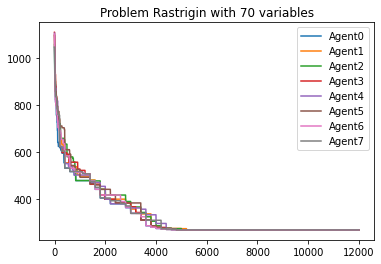

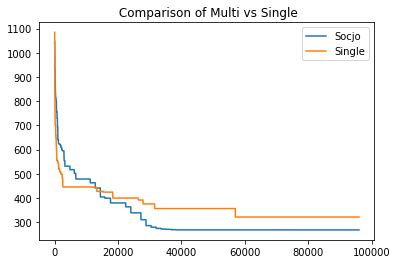

cycle 0
cycle 1
cycle 2
cycle 3
cycle 4
cycle 5
cycle 6
cycle 7
cycle 8
cycle 9
cycle 10
cycle 11
cycle 12
cycle 13
cycle 14
cycle 15
cycle 16
cycle 17
cycle 18
cycle 19
cycle 20
cycle 21
cycle 22
cycle 23
cycle 24
cycle 25
cycle 26
cycle 27
cycle 28
cycle 29
cycle 30
cycle 31
cycle 32
cycle 33
cycle 34
cycle 35
cycle 36
cycle 37
cycle 38
cycle 39
cycle 40
cycle 41
cycle 42
cycle 43
cycle 44
cycle 45
cycle 46
cycle 47
cycle 48
cycle 49
cycle 50
cycle 51
cycle 52
cycle 53
cycle 54
cycle 55
cycle 56
cycle 57
cycle 58
cycle 59
Running comparison


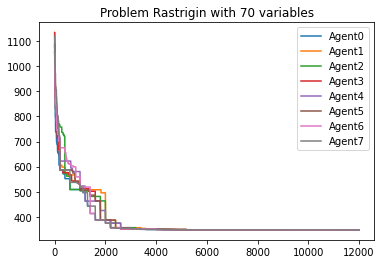

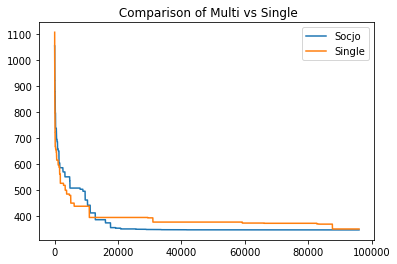

In [1]:
from Evolutionary_algorithm import EvolutionAlgoritm
from jmetal.operator import SBXCrossover, PolynomialMutation, BinaryTournamentSelection
from jmetal.problem.singleobjective.unconstrained import Rastrigin
from jmetal.util.termination_criterion import StoppingByEvaluations
from Island import Island
from random import randint
from Agent import Agent
from Executor import MultiAgentRunner
from communication import AttiduteType
from StatisticRunner import StatisticRunner
from communication import CommunicationBasic





problem = Rastrigin(number_of_variables = 70)


Agents =  []
for i in range(0,8):
    Island1 = Island(algorithm=EvolutionAlgoritm(
    problem=problem, 
    population_size=50 -2*i,
    offspring_population_size= 100 -8*i,
    mutation=PolynomialMutation(probability=0.5 + 0.03*i / problem.number_of_variables, distribution_index=20 +i),
    crossover= SBXCrossover(probability=0.04 * i + 0.01),
    selection= BinaryTournamentSelection(),
    termination_criterion=StoppingByEvaluations(max_evaluations=100000)))
    Island1.start()
    Agents.append(Agent(Island1, name= f"Agent{i}", attidute= AttiduteType(i % 3), communication_type=CommunicationBasic()))

i = 5

Island2 = Island(algorithm=EvolutionAlgoritm(
problem=problem, 
population_size=50 -2*i,
offspring_population_size= 100 -8*i,
mutation=PolynomialMutation(probability=0.5 + 0.01*i / problem.number_of_variables, distribution_index=20 +i),
crossover= SBXCrossover(probability=0.01 * i + 0.01),
selection= BinaryTournamentSelection(),
termination_criterion=StoppingByEvaluations(max_evaluations=100000)))
Island2.start()
agent_single = Agent(Island2, name= f"Agent single", attidute= AttiduteType(1), communication_type=CommunicationBasic())


runner = MultiAgentRunner(agents= Agents, agent_single= agent_single)

Statistic_runner = StatisticRunner(runner)

Statistic_runner.run_an_collect_data(no_runs = 20, cycles=60, cycle_iter=200, num_of_comm=2)



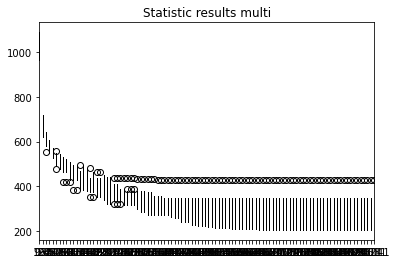

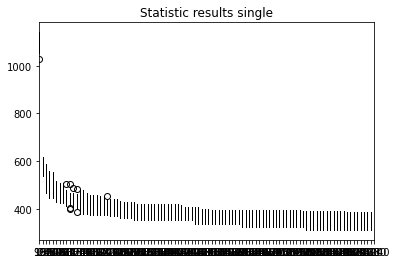

In [2]:
Statistic_runner.plot()
